# Iris Dataset

## Importing Basic Libraries

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings("ignore")

In [2]:
iris_data = load_iris()

## About Data

In [5]:
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [22]:
dataset = pd.DataFrame(iris_data.data,columns = iris_data.feature_names)

## Explorartory Data Analysis

In [23]:
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
len(set(iris_data.target))

3

In [25]:
dataset.shape

(150, 4)

In [26]:
dataset.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [27]:
dataset.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [28]:
dataset.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

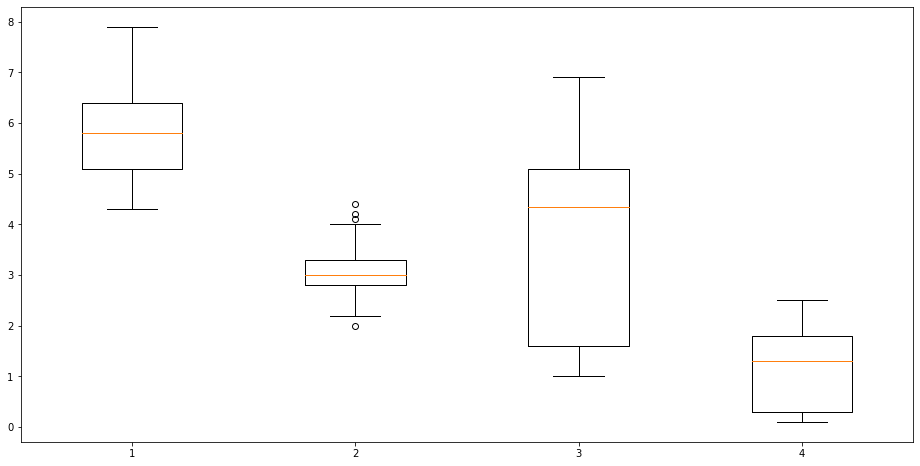

In [29]:
plt.figure(figsize = (16,8))
plt.boxplot(dataset)
plt.show()

## Removing Outliers

In [30]:
q1 = dataset["sepal width (cm)"].quantile(0.25)
q3 = dataset["sepal width (cm)"].quantile(0.75)
iqr = q3 - q1
lc = q1 - 1.5*iqr
uc = q3 + 1.5*iqr

In [32]:
dataset["sepal width (cm)"] = dataset["sepal width (cm)"].clip(lower = lc,upper = uc)

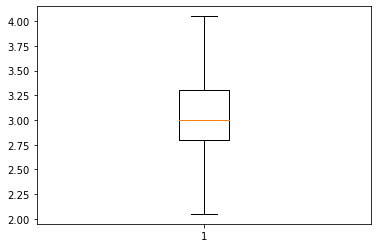

In [34]:
plt.boxplot(dataset["sepal width (cm)"])
plt.show()

## Preprocessing data

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [36]:
dataset_tranform_scaled = scaler.fit_transform(dataset)

In [39]:
dataset_tranform_scaled = pd.DataFrame(dataset_tranform_scaled, columns = iris_data.feature_names)

In [40]:
dataset_tranform_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.725,0.067797,0.041667
1,0.166667,0.475,0.067797,0.041667
2,0.111111,0.575,0.050847,0.041667
3,0.083333,0.525,0.084746,0.041667
4,0.194444,0.775,0.067797,0.041667


## Feature Engineering the data

In [41]:
from sklearn.feature_selection import SelectKBest, f_classif

In [63]:
feature_select = SelectKBest(f_classif, 3)

In [64]:
dataset_transform_features = feature_select.fit_transform(dataset_tranform_scaled, iris_data.target)

In [65]:
dataset_transform_features = pd.DataFrame(dataset_transform_features)

In [66]:
dataset_transform_features.head()

,0,1,2
0,0.222222,0.067797,0.041667
1,0.166667,0.067797,0.041667
2,0.111111,0.050847,0.041667
3,0.083333,0.084746,0.041667
4,0.194444,0.067797,0.041667


## Final dataset formation

In [67]:
dataset_transform_features["target"] = iris_data.target

In [68]:
final_dataset = dataset_transform_features

In [69]:
final_dataset.head()

,0,1,2,target
0,0.222222,0.067797,0.041667,0
1,0.166667,0.067797,0.041667,0
2,0.111111,0.050847,0.041667,0
3,0.083333,0.084746,0.041667,0
4,0.194444,0.067797,0.041667,0


<AxesSubplot:>

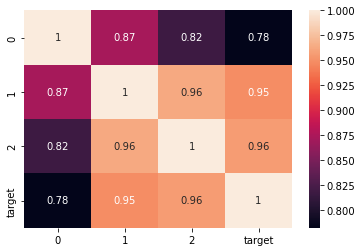

In [70]:
sns.heatmap(final_dataset.corr(), annot = True)
plt.show()

In [72]:
final_dataset = final_dataset.drop(1, axis = 1)

In [73]:
final_dataset.head()

,0,2,target
0,0.222222,0.041667,0
1,0.166667,0.041667,0
2,0.111111,0.041667,0
3,0.083333,0.041667,0
4,0.194444,0.041667,0


## Modelling the Data

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier 
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [76]:
X = final_dataset.drop("target",axis = 1)
y = final_dataset.target

In [77]:
X.shape,y.shape

((150, 2), (150,))

In [78]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 1)

In [79]:
x_train.shape,x_test.shape

((112, 2), (38, 2))

In [80]:
y_train.shape,y_test.shape

((112,), (38,))

In [82]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [84]:
train_acc = accuracy_score(y_train,y_train_pred)
train_conf_matrix = confusion_matrix(y_train,y_train_pred)

In [85]:
test_acc = accuracy_score(y_test,y_test_pred)
test_conf_matrix = confusion_matrix(y_test,y_test_pred)

In [87]:
print(train_acc,test_acc)
print(train_conf_matrix)
print(test_conf_matrix)

0.8571428571428571 0.868421052631579
[[37  0  0]
 [ 3 19 12]
 [ 0  1 40]]
[[13  0  0]
 [ 0 11  5]
 [ 0  0  9]]


In [88]:
sgd = SGDClassifier()
sgd.fit(x_train,y_train)
y_train_pred = sgd.predict(x_train)
y_test_pred = sgd.predict(x_test)

In [89]:
train_acc = accuracy_score(y_train,y_train_pred)
train_conf_matrix = confusion_matrix(y_train,y_train_pred)

In [90]:
test_acc = accuracy_score(y_test,y_test_pred)
test_conf_matrix = confusion_matrix(y_test,y_test_pred)

In [91]:
print(train_acc,test_acc)
print(train_conf_matrix)
print(test_conf_matrix)

0.9107142857142857 0.8421052631578947
[[37  0  0]
 [ 0 25  9]
 [ 0  1 40]]
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]


In [93]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_train_pred = dtc.predict(x_train)
y_test_pred = dtc.predict(x_test)

In [94]:
train_acc = accuracy_score(y_train,y_train_pred)
train_conf_matrix = confusion_matrix(y_train,y_train_pred)

In [95]:
test_acc = accuracy_score(y_test,y_test_pred)
test_conf_matrix = confusion_matrix(y_test,y_test_pred)

In [96]:
print(train_acc,test_acc)
print(train_conf_matrix)
print(test_conf_matrix)

0.9732142857142857 0.9473684210526315
[[37  0  0]
 [ 0 34  0]
 [ 0  3 38]]
[[13  0  0]
 [ 0 14  2]
 [ 0  0  9]]


In [97]:
svc = SVC()
svc.fit(x_train,y_train)
y_train_pred = svc.predict(x_train)
y_test_pred = svc.predict(x_test)

In [98]:
train_acc = accuracy_score(y_train,y_train_pred)
train_conf_matrix = confusion_matrix(y_train,y_train_pred)

In [99]:
test_acc = accuracy_score(y_test,y_test_pred)
test_conf_matrix = confusion_matrix(y_test,y_test_pred)

In [100]:
print(train_acc,test_acc)
print(train_conf_matrix)
print(test_conf_matrix)

0.9642857142857143 0.9736842105263158
[[37  0  0]
 [ 0 33  1]
 [ 0  3 38]]
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [101]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_train_pred = rfc.predict(x_train)
y_test_pred = rfc.predict(x_test)

In [102]:
train_acc = accuracy_score(y_train,y_train_pred)
train_conf_matrix = confusion_matrix(y_train,y_train_pred)

In [103]:
test_acc = accuracy_score(y_test,y_test_pred)
test_conf_matrix = confusion_matrix(y_test,y_test_pred)

In [104]:
print(train_acc,test_acc)
print(train_conf_matrix)
print(test_conf_matrix)

0.9732142857142857 0.9473684210526315
[[37  0  0]
 [ 0 33  1]
 [ 0  2 39]]
[[13  0  0]
 [ 0 14  2]
 [ 0  0  9]]


## Conclusion

### From above Observations SVC is best to predict iris dataset